### Univariate Plots (Revised after meeting 03/05/2025)

In this notebook we examine the distribution of each feature one-by-one. The final section of the notebook contains some general observation and takeaways, with preliminary recommendations for data cleaning and feature selection.

#### Load and Examine the Data

In [252]:
# Read in data, examine first few rows
df = pd.read_csv("../data/train_set.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,16466,Intermediate,No,Poor,No,1.0,4.0,TBI + Cy +- Other,No,4.0,Peripheral blood,No,No,No,IPA,3.0,+/-,NaN,NaN,NaN,4.0,1.0,No,1.0,2.0,PB,Poor,RIC,Not Hispanic or Latino,2013,No,NaN,Yes,NaN,1.0,No,47.501,No,1.0,NaN,52.107,2.0,FK+ MMF +- others,No,F-M,1.0,American Indian or Alaska Native,0.0,90.0,No,NaN,Related,"N/A, Mel not given",5.0,No,1.0,No,7.0,0.0,93.779
1,4038,Intermediate,No,Poor,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,ALL,6.0,-/+,10.0,2.0,P/P,6.0,2.0,NaN,2.0,2.0,PB,Intermediate,No drugs reported,Not Hispanic or Latino,2018,Yes,Positive,No,NaN,2.0,No,24.692,No,2.0,NaN,50.588,2.0,FK+ MMF +- others,NaN,M-F,2.0,Asian,2.0,60.0,No,NaN,Unrelated,MEL,8.0,No,2.0,No,10.0,1.0,12.088
2,7006,High,Yes,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,IPA,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,RIC,Not Hispanic or Latino,2018,No,NaN,No,Permissive,2.0,No,19.362,No,2.0,No,64.760,2.0,FK+ MMF +- others,No,M-M,2.0,Native Hawaiian or other Pacific Islander,4.0,90.0,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,0.0,25.724
3,9798,High - TED AML case <missing cytogenetics,No,Poor,Yes,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,NaN,MAC,Not Hispanic or Latino,2016,Yes,Positive,Yes,Permissive,2.0,No,28.968,No,2.0,No,0.044,2.0,FK+ MMF +- others,No,M-F,2.0,American Indian or Alaska Native,0.0,90.0,No,Permissive mismatched,Unrelated,MEL,8.0,No,2.0,No,10.0,0.0,43.373
4,14496,TBD cytogenetics,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/-,10.0,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,MAC,Not Hispanic or Latino,2017,No,Negative,Yes,Permissive,2.0,No,22.974,No,2.0,No,4.146,2.0,FK+ MTX +- others(not MMF),No,F-F,2.0,More than one race,0.0,80.0,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,1.0,8.593


In [253]:
print("The training set frame has {} rows and {} columns".format(df_all.shape[0], df_all.shape[1]))

The training set frame has 23040 rows and 60 columns


##### Check for Missing Values

In [254]:
# Check the percent of values in ech column that are missing. 
# We see that there are eight features with 20% or more missing values,
# and two features with over 50% missing values.
# The two column which encode our target (efs and efs_time)
# have no missing values.

pd.DataFrame(df.isna().sum()/df.shape[0] * 100).reset_index() \
    .rename(columns={"index":"Feature", 0:"Percent Missing"}) \
    .sort_values(by="Percent Missing", ascending=False)

,Feature,Percent Missing
33,tce_match,66.032986
31,mrd_hct,57.773438
26,cyto_score_detail,41.362847
50,tce_div_match,39.648438
19,tce_imm_match,38.715278
3,cyto_score,27.877604
17,hla_high_res_10,24.822049
6,hla_high_res_8,20.121528
15,hla_high_res_6,18.255208
18,hla_match_dqb1_high,17.999132


In [255]:
# For now, we will keep all rows and columns--even those with missing data.
# We drop the ID column, which does not contain information useful for modeling.
# We also replace the numerical values in the efs column
# with text values, which are easier to interpret.

df = df.drop("ID", axis=1)
df['efs'] = df['efs'].replace({0:"Censored", 1:"Event"})

##### Basic Descriptive Statistics for Numeric Columns

In [256]:
# Check which datatypes exist in the data.
# We have dtype 'O' (for 'object', pandas categorical datatype)
# as well as integer and floating-point datatypes.
# We will confirm that the datatype for each column makes sense
# when we examine the columns individually.
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [257]:
# Compute basic descriptive statistics for numerical variables.
# It appears that many of these features take just a few 
# integer values. 

df_numeric = df.select_dtypes(['float64', 'int64'])
df_numeric.describe()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,hla_match_a_high,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs_time
count,19370.000000,18404.000000,20462.000000,18834.000000,17321.000000,18893.000000,19699.000000,20842.000000,20972.000000,19703.000000,23040.000000,19607.000000,21585.000000,21024.000000,23040.000000,21154.000000,19803.000000,22669.000000,22334.000000,20165.000000,20373.000000,19006.000000,23040.000000
mean,1.762881,6.871332,5.142997,5.106510,8.611858,1.737892,5.160160,1.757029,1.715716,1.774045,2015.172960,1.702096,42.556565,1.718655,38.779607,1.708849,1.698329,1.706824,83.862721,6.902951,1.707260,8.663369,23.248850
std,0.433384,1.569407,1.208275,1.217109,1.910823,0.447547,1.204193,0.435549,0.451083,0.427226,3.149926,0.463001,15.265324,0.455238,21.132123,0.458447,0.465766,1.999752,11.005230,1.566598,0.460713,1.885659,24.840521
min,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,0.000000,18.010000,0.000000,0.044000,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,4.000000,0.333000
25%,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2013.000000,1.000000,28.482000,1.000000,19.779250,1.000000,1.000000,0.000000,70.000000,6.000000,1.000000,7.000000,5.600000
50%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,2.000000,40.115000,2.000000,41.141000,2.000000,2.000000,1.000000,90.000000,8.000000,2.000000,10.000000,9.755500
75%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,2.000000,56.230000,2.000000,56.074250,2.000000,2.000000,2.000000,90.000000,8.000000,2.000000,10.000000,35.200250
max,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,2.000000,84.800000,2.000000,73.670000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,156.819000


#### Define Helper Functions to Plot Features

In [258]:
# Function that takes the name of a discrete feature
# and produces a barplot of the number of 
# cases for each value of the feature.
# May be used for either categorical features
# or integer features which only take a
# few distinct values.

def plot_discrete_feature(feat_name, df=df, tick_angle = 0, figsize=(5, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    cat_order = None
    if df[feat_name].dtype == 'O':
        cat_order = df[feat_name].value_counts().index.to_list()
    sns.countplot(df, x = feat_name, order=cat_order)
    plt.xlabel(feat_name)
    plt.ylabel("Number of cases ")
    plt.title("Number of cases by {}".format(feat_name))
    ax.tick_params(axis='x', rotation=tick_angle)
    plt.show()

In [259]:
# Function that takes the name of a numeric feature
# and produces a figure with two subplots:
# a boxplot of the feature, and a histogram.
# Boxplots are often useful for detecting outliers,
# while histograms give more insight into the
# overall shape of a distribution.

def plot_numeric_feature(feat_name, data = df, bins=10, kde=True, discrete=False):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle("Distribution of {}".format(feat_name))
    sns.boxplot(data = df, y=feat_name, ax=ax[0])
    sns.histplot(data = df, x=feat_name, ax=ax[1], kde=kde, bins=bins, discrete=discrete)
    plt.subplots_adjust(wspace=0.4)
    ax[1].set_ylabel("Number of cases")
    plt.show()

In [260]:
# While this notebook is mostly for univariate analysis,
# I am including a function here which plots efs_time (survival time)
# broken down by efs (event/censored).
# These two variables can be viewed as jointly encoding
# our true modeling objective (survival time).

def plot_efs_vs_efs_time(bins=10):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle("Distribution of efs_time by efs")
    sns.boxplot(data = df, y="efs_time", x = "efs", hue="efs", ax=ax[0])
    sns.histplot(data = df, x="efs_time", hue="efs", ax=ax[1], multiple='stack', bins=bins)
    plt.subplots_adjust(wspace=0.3)
    ax[0].legend([], [], frameon=False)
    ax[0].set_ylabel("")
    ax[1].set_ylabel("Number of cases")
    plt.show()

#### Univariate Distributions of Features

Instead of following the order in the data dictionary, we try to group features with related meanings together. These groupings are somewhat subjective, but are intended to make the EDA easier to navigate. Brief note sare included at the end of each.

##### Demographic information   

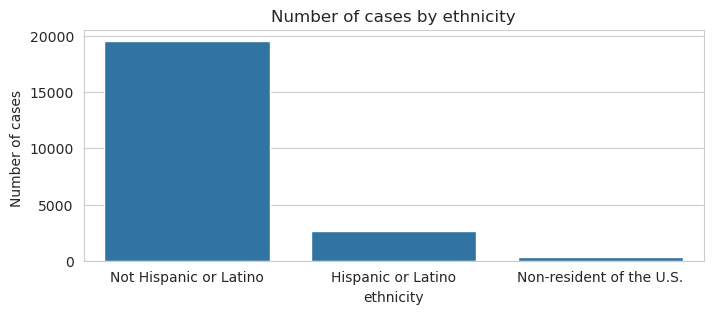

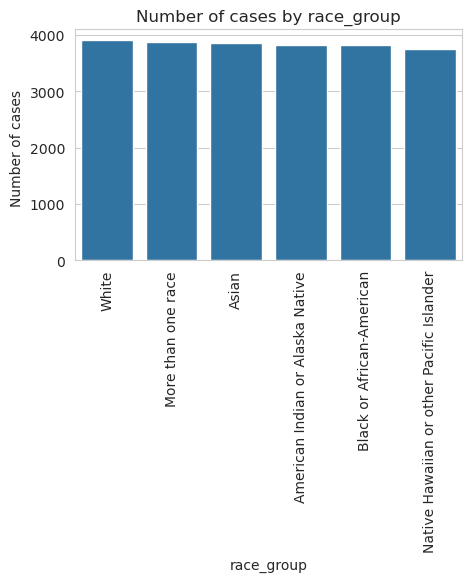

In [261]:
# Plot number of cases by value of ethnicity
plot_discrete_feature('ethnicity', figsize=(8, 3))

# Plot number of cases by value of race_group
plot_discrete_feature('race_group', tick_angle=90)

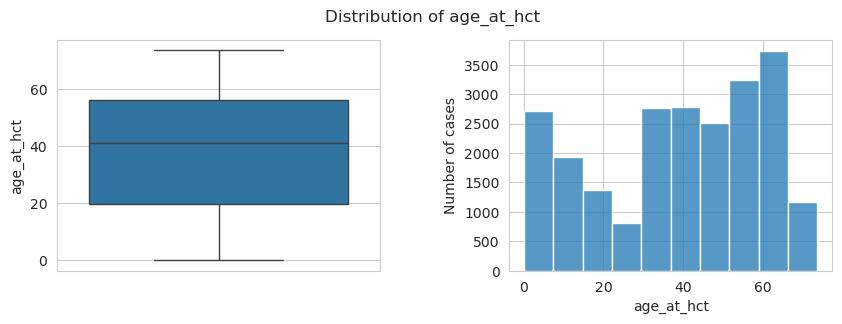

In [262]:
#Plot distribution of values for  Age at HCT
plot_numeric_feature('age_at_hct', kde=False)

##### Disease type and severity

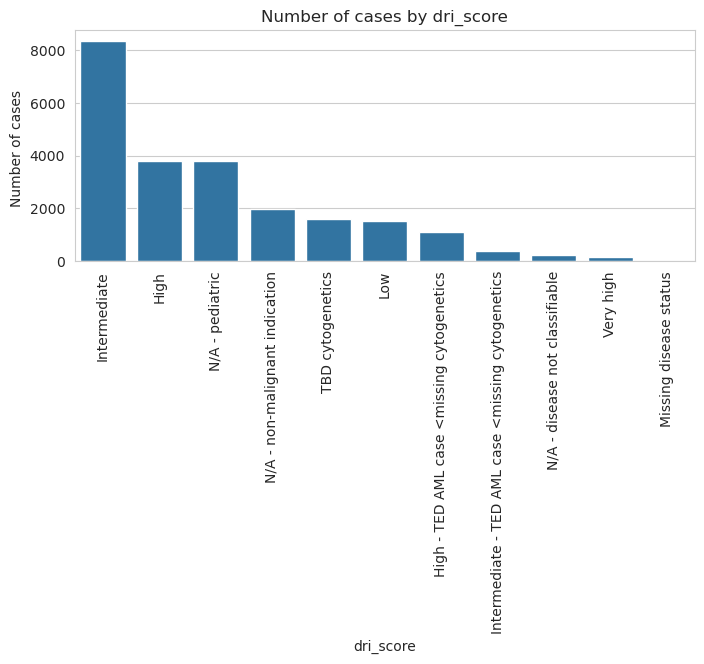

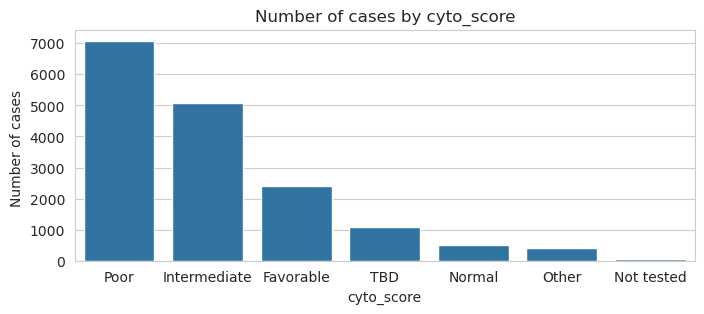

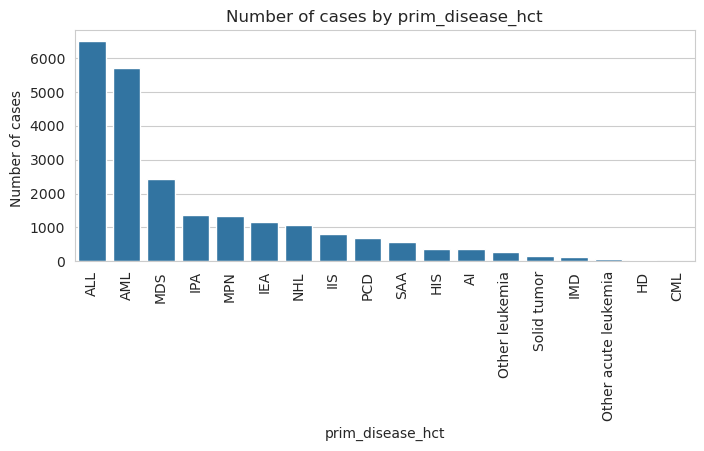

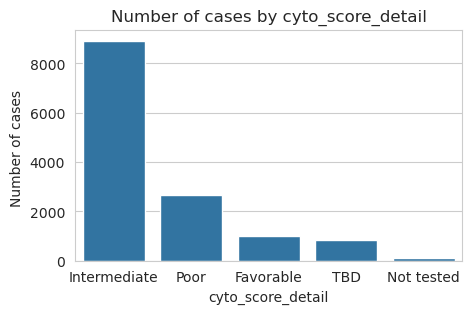

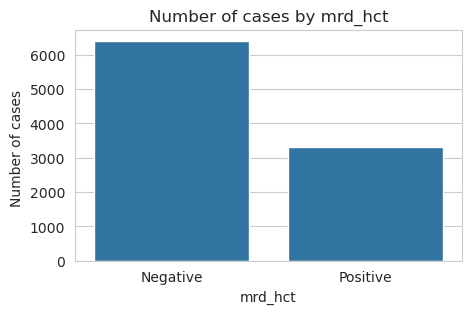

In [263]:
# Plot number of cases by value of dri_score
plot_discrete_feature('dri_score', tick_angle=90, figsize=(8, 3))

# Plot number of cases by value of cyto_score
plot_discrete_feature('cyto_score', figsize=(8, 3))

# Plot number of cases by value of prim_disease_hct
plot_discrete_feature('prim_disease_hct', figsize=(8, 3), tick_angle=90)

# For features with fewer categories, 
# it is convenient to plot them all in a loop
disease_type_features = ['cyto_score_detail', 'mrd_hct']
for feat in disease_type_features:
    plot_discrete_feature(feat)

##### Comorbidities and health history

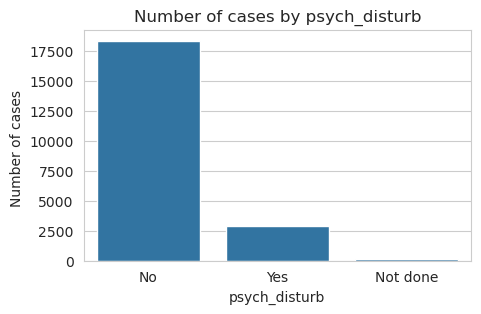

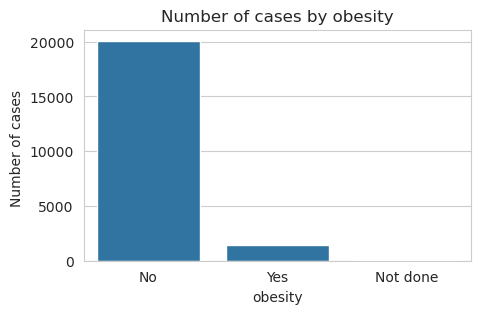

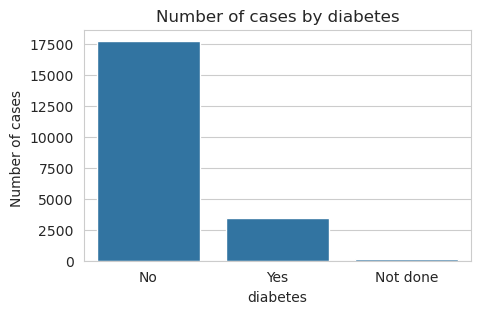

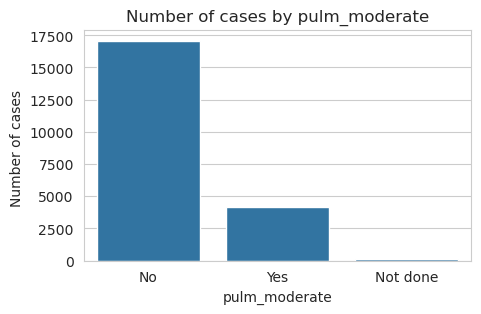

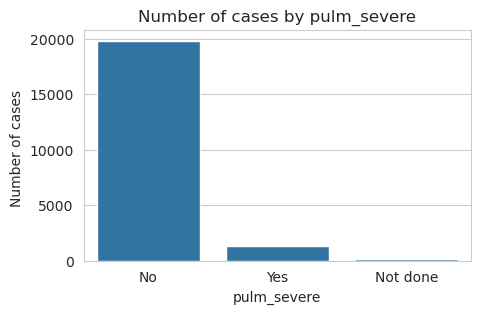

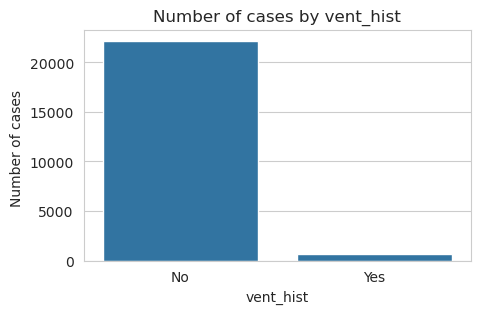

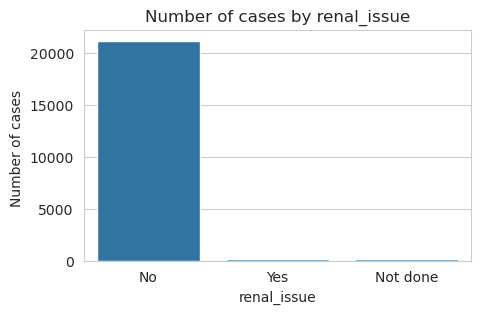

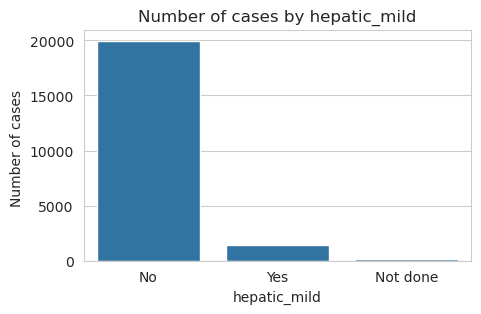

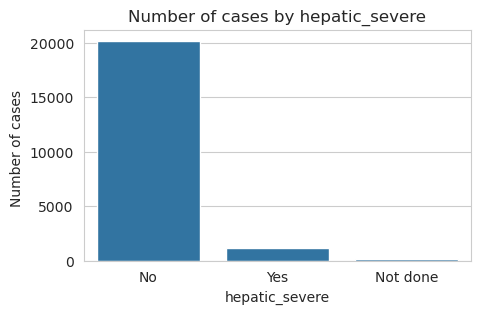

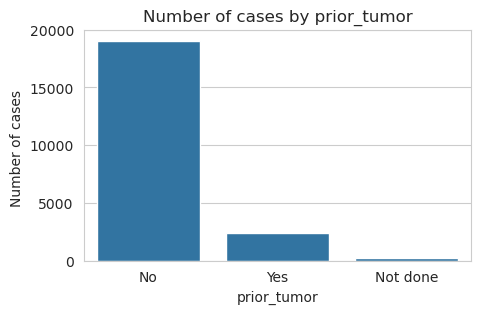

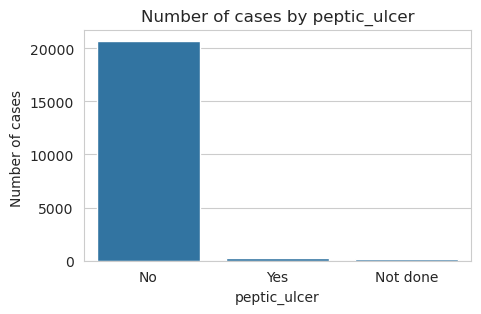

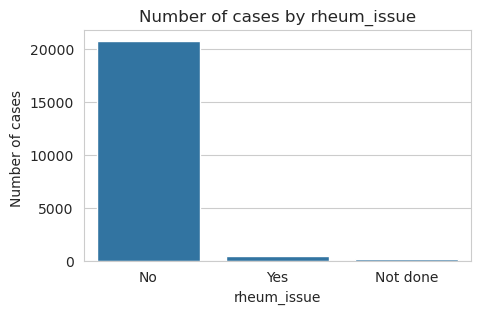

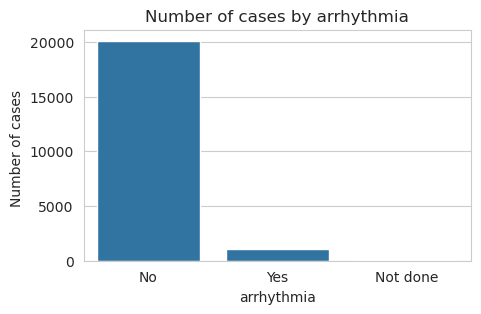

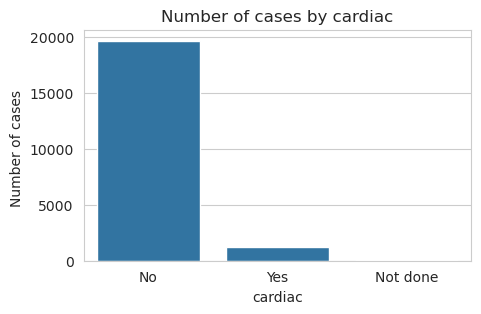

In [264]:
# Plot number of cases by value of for each discrete feature
# which indicates a specific comorbidity or health condition

health_indicators = ['psych_disturb', 
                     'obesity', 'diabetes',
                     'pulm_moderate', 'pulm_severe', 'vent_hist',
                     'renal_issue',
                     'hepatic_mild', 'hepatic_severe',
                     'prior_tumor', 'peptic_ulcer', 'rheum_issue',  
                     'arrhythmia', 'cardiac']

for feat_name in health_indicators:
    plot_discrete_feature(feat_name)

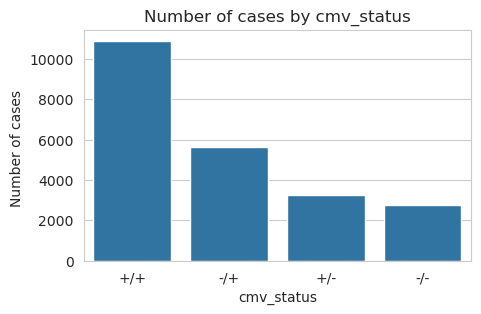

In [265]:
# The feature cmv_status is unique
# in that it records present of antibodies
# to cmv in both the donor and the recipient.

plot_discrete_feature('cmv_status')

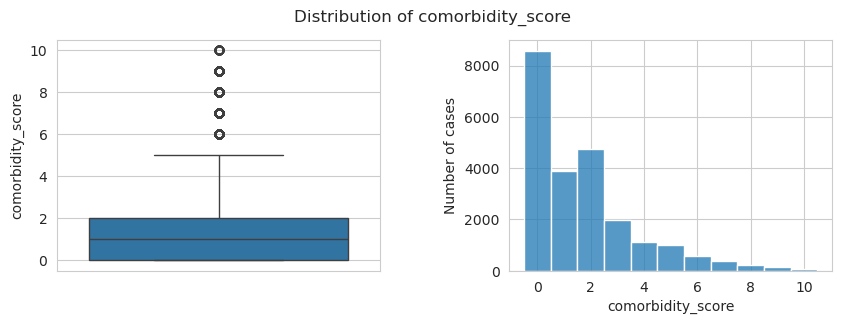

In [266]:
# Comorbidity score gives a numerical measure 
# of overall comorbidites
plot_numeric_feature('comorbidity_score', kde=False, discrete=True)

##### HLA (human leukocyte antigen) matching

In [267]:
# Convenience function for plotting 
# countplots of pairs of features, 
# which represent low and high-resolution
# matching on the same genetic loci.

def plot_low_high_hla_match(feat_name, df=df, figsize = (10, 2.5)):
    
    fig, ax = plt.subplots(1, 2, figsize=figsize, sharey=True)
    if "low" in feat_name:
        feat_low = feat_name
        feat_high = feat_name.replace("low", "high")
    else:
        print("Please enter a feature name for a low-resolution HLA match.")
        return

    for idx, feat in enumerate([feat_low, feat_high]): 
        sns.countplot(df, x = feat, ax = ax[idx])
        ax[idx].set_xlabel(feat)
        ax[idx].set_ylabel("Number of cases")
        ax[idx].set_title("Cases by {}".format(feat))
    
    plt.subplots_adjust(wspace=0.2)
    plt.show()

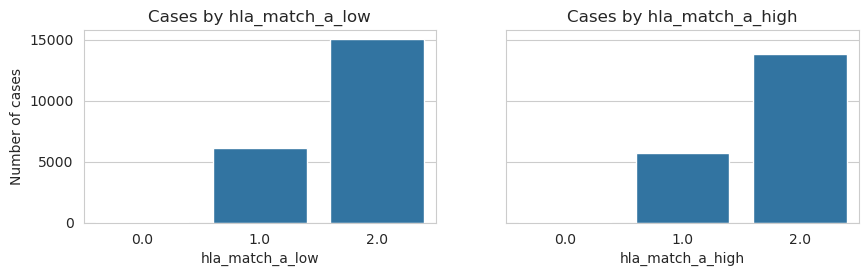

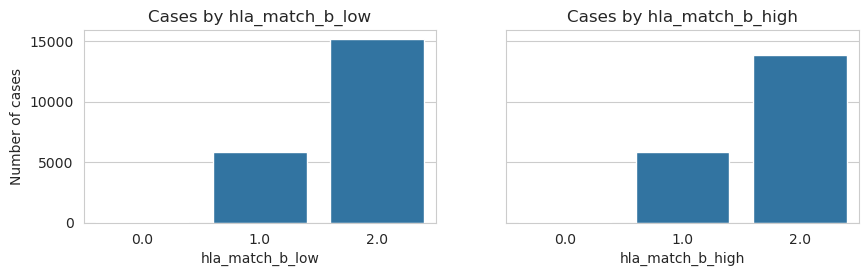

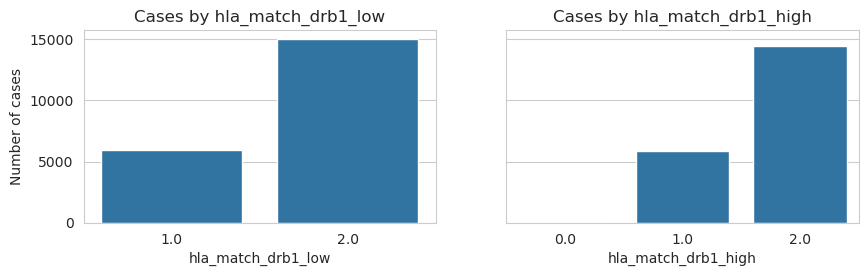

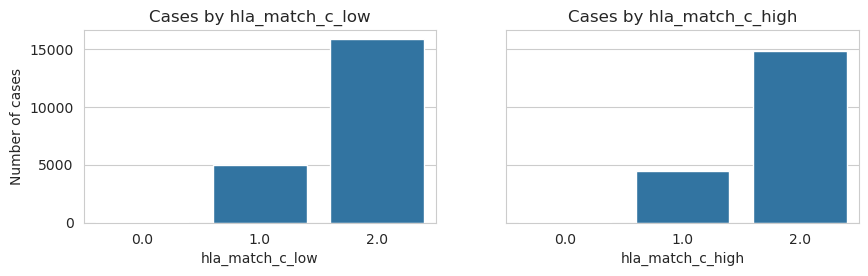

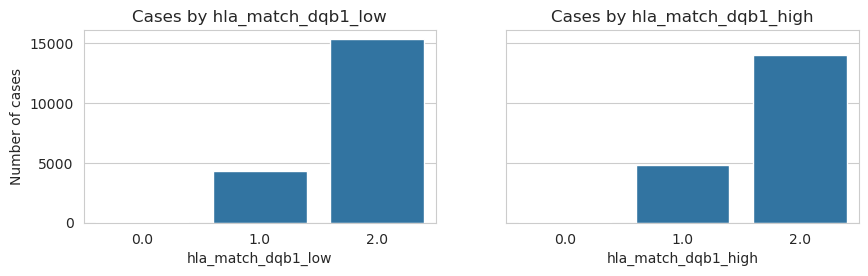

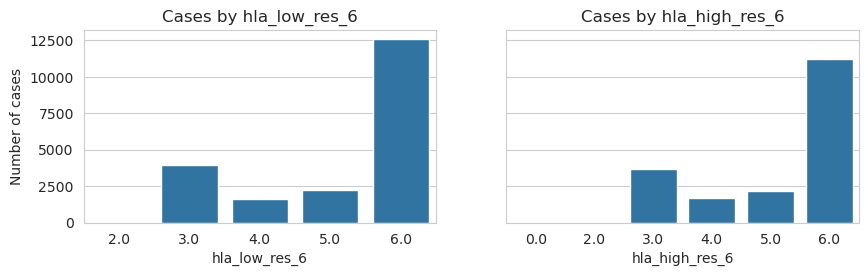

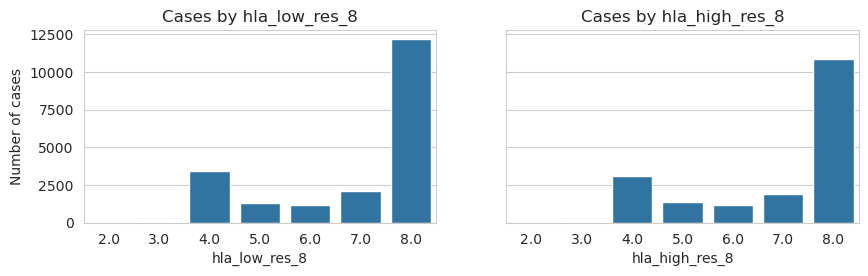

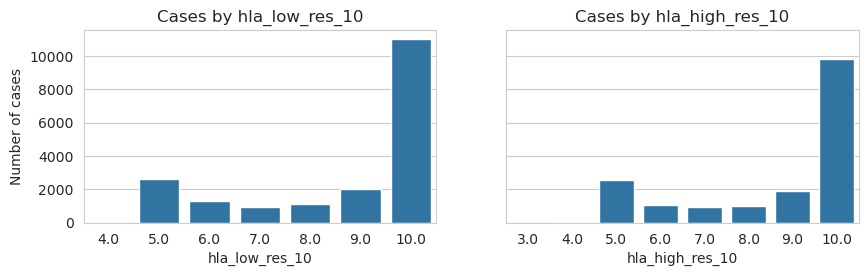

In [268]:
hla_features = ['hla_match_a_low', 'hla_match_b_low', 'hla_match_drb1_low',
                'hla_match_c_low', 'hla_match_dqb1_low',
                'hla_low_res_6', 'hla_low_res_8', 'hla_low_res_10']

for feature in hla_features:
    plot_low_high_hla_match(feature)

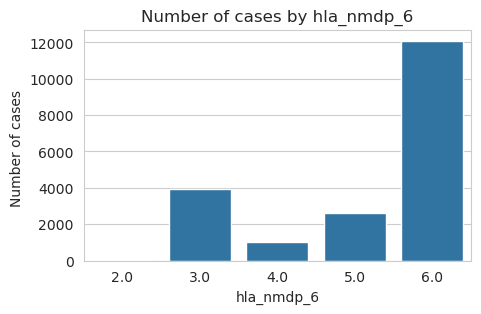

In [281]:
# The feature breaks the pattern slightly, 
# being a mixture of high and low resolution matching.
# The shape of the distribution is similar to
# that of hla_low_res_6 and hla_high_res_6.

plot_discrete_feature('hla_nmdp_6')

##### T-cell epiptope matching

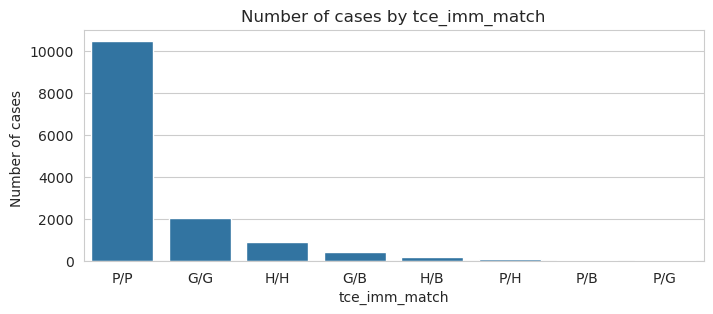

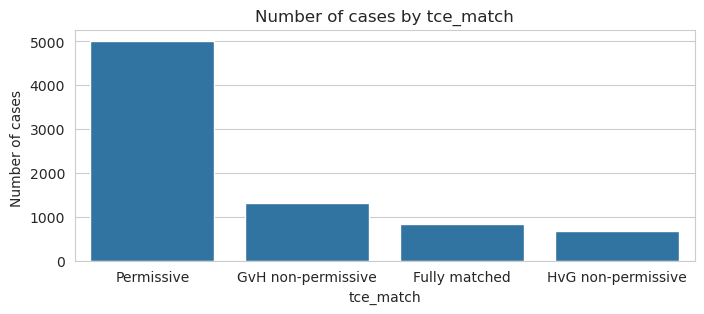

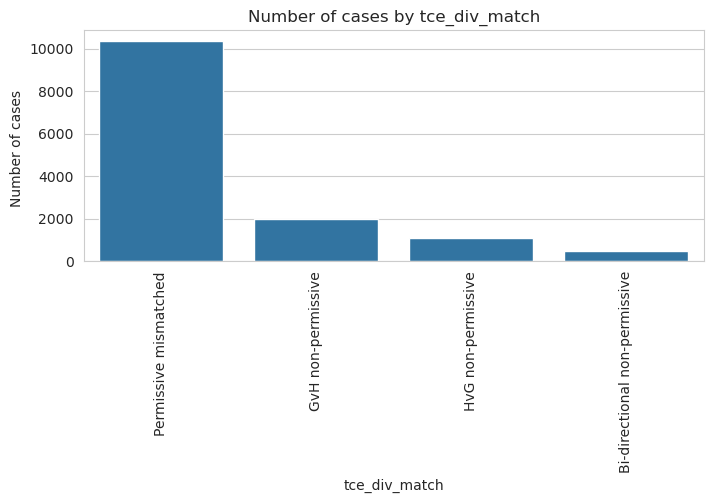

In [269]:
# Plot number of cases by value 
# for discrete features related to T-cell epiptope matching

tce_match_features = [('tce_imm_match', 0), ('tce_match',0), ('tce_div_match', 90)]
for feat in tce_match_features:
    plot_discrete_feature(feat[0], figsize=(8, 3), tick_angle=feat[1])

##### Treatment details

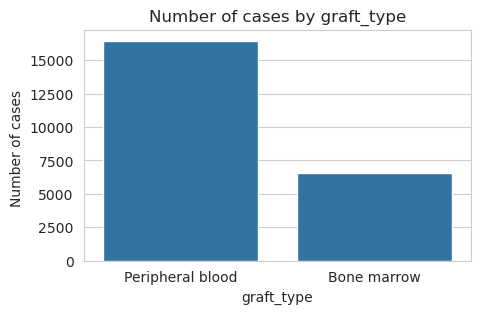

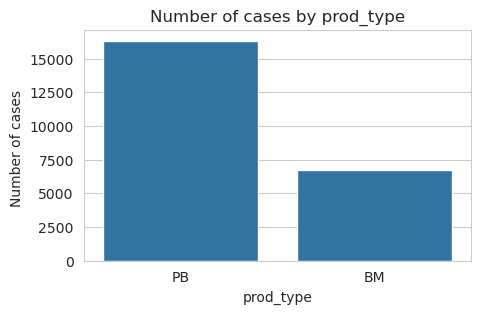

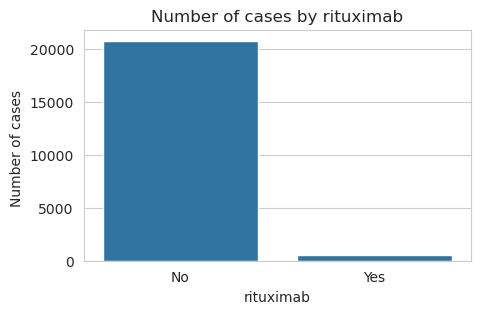

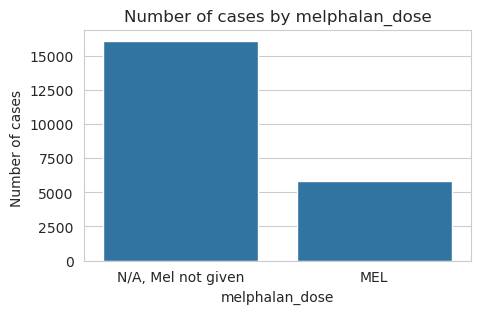

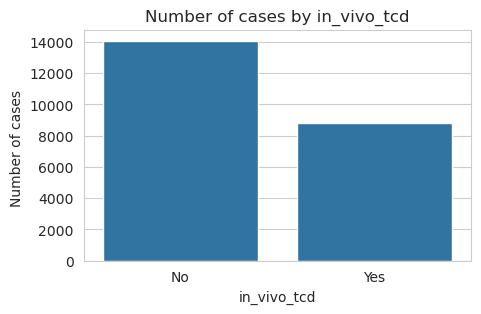

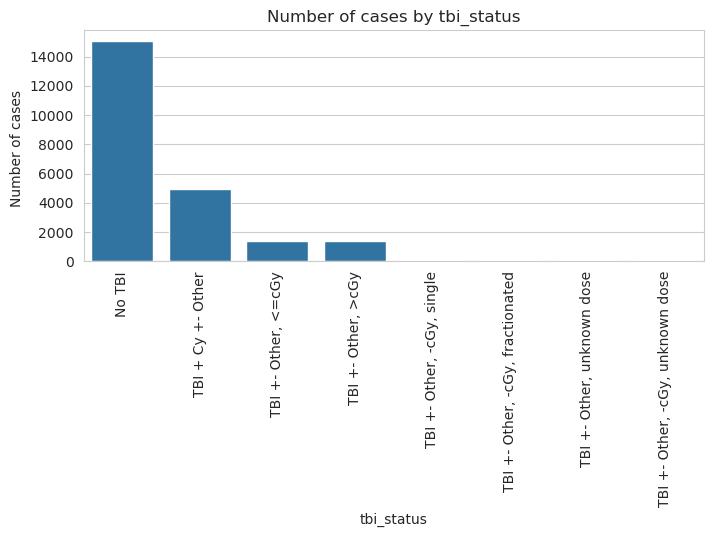

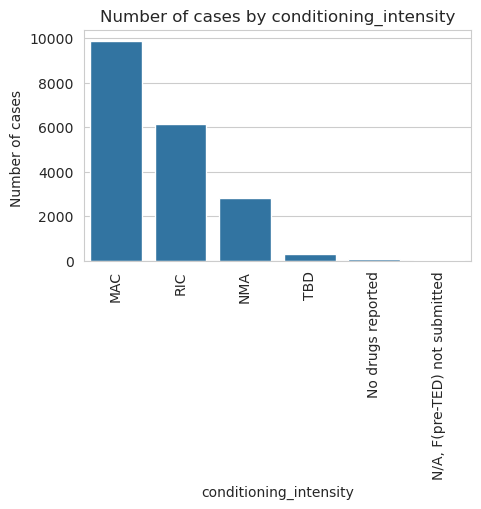

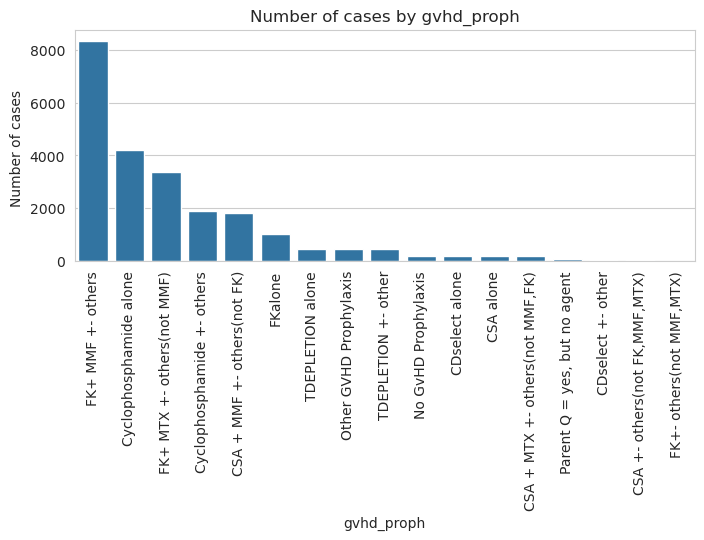

In [270]:
# For features with fewer categories,
# it's easiest to plot them all in a single loop

treatment_features = ['graft_type', 'prod_type', 'rituximab', 'melphalan_dose', 'in_vivo_tcd']
for feat in treatment_features:
    plot_discrete_feature(feat)

# Plot number of cases by value of tbi_status
plot_discrete_feature('tbi_status', figsize=(8, 3), tick_angle = 90)

# Plot number of cases by value of conditioning_intensity
plot_discrete_feature('conditioning_intensity', tick_angle=90)

# Plot number of cases by value of gvhd_proph
plot_discrete_feature('gvhd_proph', figsize=(8,3), tick_angle=90)

##### Other features

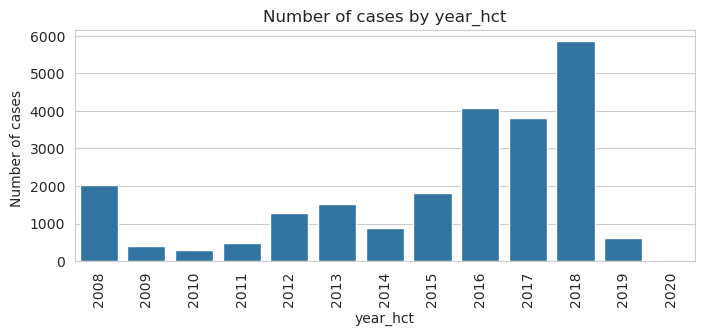

In [271]:
# Plot number of cases by value of year_hct
plot_discrete_feature('year_hct', figsize=(8, 3), tick_angle=90)

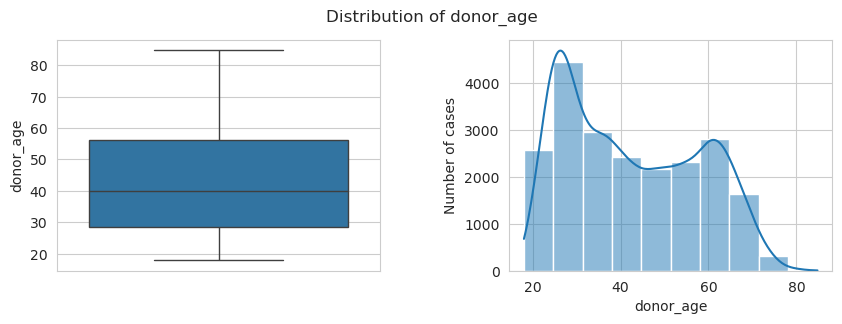

In [272]:
# Plot distribution of values for donor_age
plot_numeric_feature('donor_age')

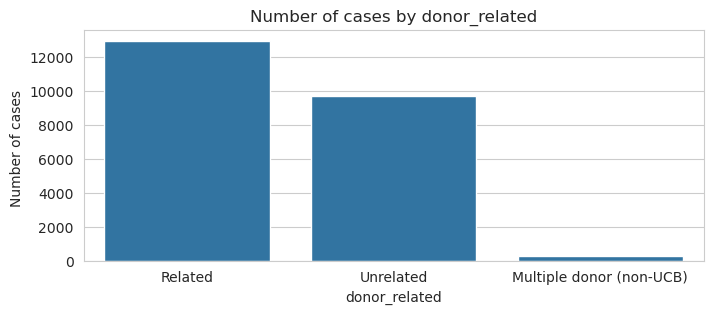

In [273]:
# Plot number of cases by value of donor_related
plot_discrete_feature('donor_related', figsize=(8, 3))

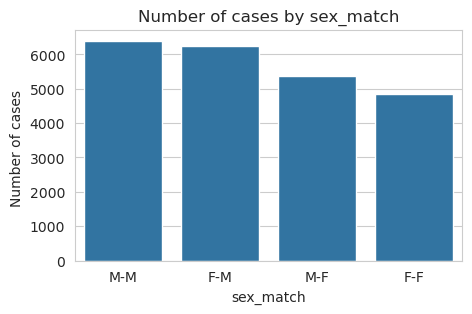

In [274]:
# Plot number of cases by value of sex_match
plot_discrete_feature('sex_match')

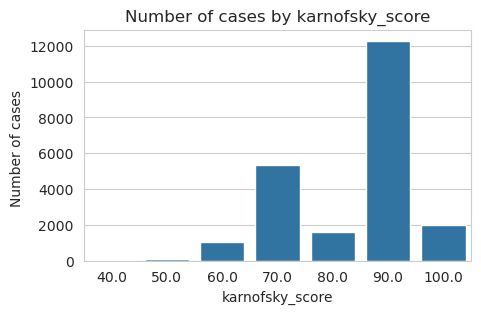

In [275]:
# Plot number of cases by 'karnofsky_score',
# which measures overall functioning.

plot_discrete_feature('karnofsky_score')

##### Target: Columns that Encode Event-Free Survival

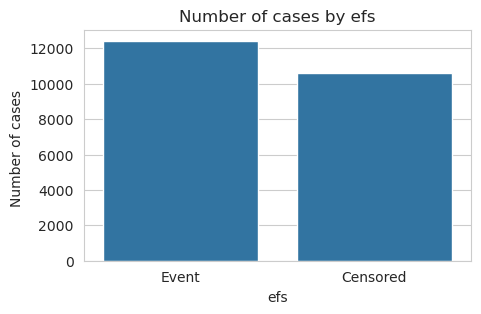

In [276]:
# Plot number of cases by value of efs
plot_discrete_feature('efs')

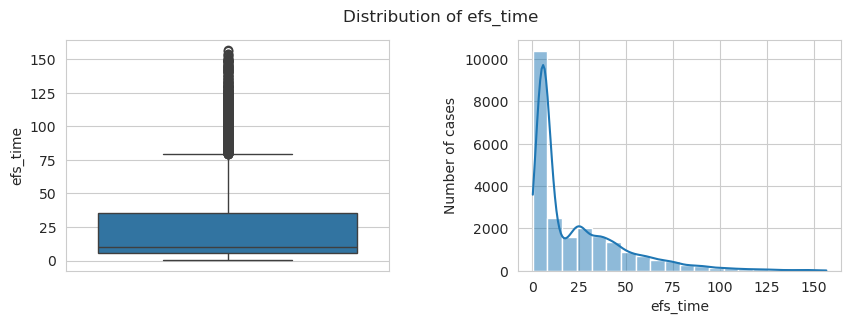

In [277]:
# Plot distribution of values for efs_time
plot_numeric_feature('efs_time', bins=20)

While bivariate analysis is a task for another notebook, `efs` and `efs_time` can be viewed as jointly encoding event-free survival, so we plot them together here.

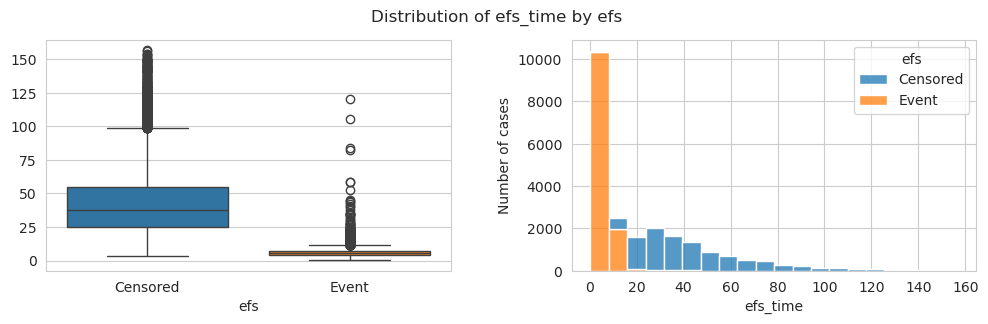

In [278]:
plot_efs_vs_efs_time(bins=20)

**Notes:** We see that survival times are generally much larger for cases coded as `Censored` versus cases coded as `Event`. In fact, there is very little overlap between the survival times for `Censored` vs `Event` cases. This suggests that the impact of censoring may not be too bad; while censoring may cause us to underestimate survival times, a majority of recorded events happen before many cases are censored. 

#### Main Take-aways

While this analysis is still very preliminary, we have a few takeaways for feature selection.
- Very few of our features are continuous numerical variables. Most numeric columns are counts or scores, which take discrete values in a defined range. We should take care to select modeling techniques that are appropriate for discrete ordinal features. (For example, Pearson correlation may not be appropriate.)
- Features which define matching on various HLA alleles come in pairs: high relution and low resolution. (These appear as column names containing "high" and "low" respectively.) Tentatively, I would suggest only keeping the "high" versions of these features, which represent more precise testing. However, I would like to verify that "high" and "low" values are both present in most cases first.
- We have several features which encode matching on groups of alleles e.g. `hla_high_res_10` combines matching results for 5 different genetic loci. Since we also have features for the individual loci, these may be considered redundant. We may or may not want to use these, depending on modeling considerations, and on how each group or individual allele correlates with survival time.
- Many features have categories which occur rarely, in 5% or less of the population. We may want to bin these categories together. The value `Not done` appears in many features, generally for a small number of cases. We may wish to code this as missing data.
- Many features indicate the presence of a particular health condition (e.g. `peptic_ulcer`). For most of these, fewer than 5% of cases are coded `Yes`. We may want to drop these features, or combine them into a single flag for uncommon health issues.
- The `comorbidity_score` feature has outliers. We might think of low values of the various HLA allele match features as outliers: typically there are very few cases at the lowest values of these features.